<a href="https://colab.research.google.com/github/brunofaragao/Lessons/blob/main/Pandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pandas


In [ ]:
# Import the library

import pandas as pd


Import dataset from excel


In [ ]:
from datetime import datetime
data = pd.read_excel('dataset_sales.xlsx')
df = pd.DataFrame(data)

df['Order Date'] = pd.to_datetime(df['Order Date'], unit='s').dt.strftime('%d-%m-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], unit='s').dt.strftime('%d-%m-%Y')
df.set_index('Row ID', inplace=True)
print(df)

              Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
Row ID                                                                       
1       CA-2016-152156  01-01-1970  01-01-1970    Second Class    CG-12520   
2       CA-2016-152156  01-01-1970  01-01-1970    Second Class    CG-12520   
3       CA-2016-138688  01-01-1970  01-01-1970    Second Class    DV-13045   
4       US-2015-108966  01-01-1970  01-01-1970  Standard Class    SO-20335   
5       US-2015-108966  01-01-1970  01-01-1970  Standard Class    SO-20335   
...                ...         ...         ...             ...         ...   
9990    CA-2014-110422  01-01-1970  01-01-1970    Second Class    TB-21400   
9991    CA-2017-121258  01-01-1970  01-01-1970  Standard Class    DB-13060   
9992    CA-2017-121258  01-01-1970  01-01-1970  Standard Class    DB-13060   
9993    CA-2017-121258  01-01-1970  01-01-1970  Standard Class    DB-13060   
9994    CA-2017-119914  01-01-1970  01-01-1970    Second Class  

In [ ]:
subData = df.loc[0:, ['State', 'Segment', 'Customer ID', 'Category', 'Sales', 'Discount', 'Profit']].copy()
print(subData)

             State    Segment Customer ID         Category     Sales  \
Row ID                                                                 
1         Kentucky   Consumer    CG-12520        Furniture  261.9600   
2         Kentucky   Consumer    CG-12520        Furniture  731.9400   
3       California  Corporate    DV-13045  Office Supplies   14.6200   
4          Florida   Consumer    SO-20335        Furniture  957.5775   
5          Florida   Consumer    SO-20335  Office Supplies   22.3680   
...            ...        ...         ...              ...       ...   
9990       Florida   Consumer    TB-21400        Furniture   25.2480   
9991    California   Consumer    DB-13060        Furniture   91.9600   
9992    California   Consumer    DB-13060       Technology  258.5760   
9993    California   Consumer    DB-13060  Office Supplies   29.6000   
9994    California   Consumer    CC-12220  Office Supplies  243.1600   

        Discount    Profit  
Row ID                      
1    

In [ ]:
# Adding 2 columns to calculate the percentage weight of each sale and profit
subData['% Sales'] = (subData['Sales']/subData['Sales'].sum()*100)
subData['% Profit'] = (subData['Profit']/subData['Profit'].sum()*100)

# Reorganize DataFrame columns
subData = subData[['State', 'Segment', 'Customer ID', 'Category', 'Sales', '% Sales', 'Discount', 'Profit', '% Profit']]
print(subData)

             State    Segment Customer ID         Category     Sales  \
Row ID                                                                 
1         Kentucky   Consumer    CG-12520        Furniture  261.9600   
2         Kentucky   Consumer    CG-12520        Furniture  731.9400   
3       California  Corporate    DV-13045  Office Supplies   14.6200   
4          Florida   Consumer    SO-20335        Furniture  957.5775   
5          Florida   Consumer    SO-20335  Office Supplies   22.3680   
...            ...        ...         ...              ...       ...   
9990       Florida   Consumer    TB-21400        Furniture   25.2480   
9991    California   Consumer    DB-13060        Furniture   91.9600   
9992    California   Consumer    DB-13060       Technology  258.5760   
9993    California   Consumer    DB-13060  Office Supplies   29.6000   
9994    California   Consumer    CC-12220  Office Supplies  243.1600   

         % Sales  Discount    Profit  % Profit  
Row ID        

Find witch category has more profit

In [ ]:
# Profit by Category of products
category_rank = subData.groupby('Category')['Profit'].sum()
print(category_rank)

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64


In [ ]:
# Profit by State
prod_rank = df.groupby('State')['Profit'].sum()
prod_rank.sort_values(ascending=True, inplace=True)

print(prod_rank)

State
Texas                  -25729.3563
Ohio                   -16971.3766
Pennsylvania           -15559.9603
Illinois               -12607.8870
North Carolina          -7490.9122
Colorado                -6527.8579
Tennessee               -5341.6936
Arizona                 -3427.9246
Florida                 -3399.3017
Oregon                  -1190.4705
Wyoming                   100.1960
West Virginia             185.9216
North Dakota              230.1497
South Dakota              394.8283
Maine                     454.4862
Idaho                     826.7231
Kansas                    836.4435
District of Columbia     1059.5893
New Mexico               1157.1161
Iowa                     1183.8119
New Hampshire            1706.5028
South Carolina           1769.0566
Montana                  1833.3285
Nebraska                 2037.0942
Louisiana                2196.1023
Vermont                  2244.9783
Utah                     2546.5335
Mississippi              3172.9762
Nevada        

In [ ]:
# Total Losses
loss_rank_num = prod_rank.where(prod_rank < 0).count()
loss_rank = prod_rank.where(prod_rank < 0).sum()
print(f'in {loss_rank_num} states, the company has a totall loss of $ {loss_rank.round(decimals=2)}')

# Total Profit
profit_rank_num = prod_rank.where(prod_rank > 0).count()
profit_rank = prod_rank.where(prod_rank > 0).sum()
print(f'in {profit_rank_num} states, the company has a totall Profit of $ {profit_rank.round(decimals=2)}')

in 10 states, the company has a totall loss of $ -98246.74
in 39 states, the company has a totall Profit of $ 384643.76


In [ ]:
# Profit vs Discounts offered
prod_rank = df.groupby('Discount')['Profit'].sum()
prod_rank.sort_values(ascending=True, inplace=True)

print(prod_rank)

print

Discount
0.70    -40075.3569
0.80    -30539.0392
0.40    -23057.0504
0.50    -20506.4281
0.30    -10369.2774
0.60     -5944.6552
0.45     -2493.1111
0.32     -2391.1377
0.15      1418.9915
0.10      9029.1770
0.20     90337.3060
0.00    320987.6032
Name: Profit, dtype: float64


In [ ]:
subData.groupby("State",group_keys=True).sum()


<ipython-input-54-78ca453c1a07>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subData.groupby("State",group_keys=True).sum()


,Sales,% Sales,Discount,Profit,% Profit
State,,,,,
Alabama,19510.6400,0.849322,0.00,5786.8253,2.020561
Arizona,35282.0010,1.535869,68.00,-3427.9246,-1.196913
Arkansas,11678.1300,0.508363,0.00,4008.6871,1.399696
California,457687.6315,19.923710,145.60,76381.3871,26.669756
Colorado,32108.1180,1.397706,57.60,-6527.8579,-2.279304
Connecticut,13384.3570,0.582638,0.60,3511.4918,1.226092
Delaware,27451.0690,1.194979,0.60,9977.3748,3.483756
District of Columbia,2865.0200,0.124718,0.00,1059.5893,0.369972
Florida,89473.7080,3.894901,114.65,-3399.3017,-1.186919


Show in a chart

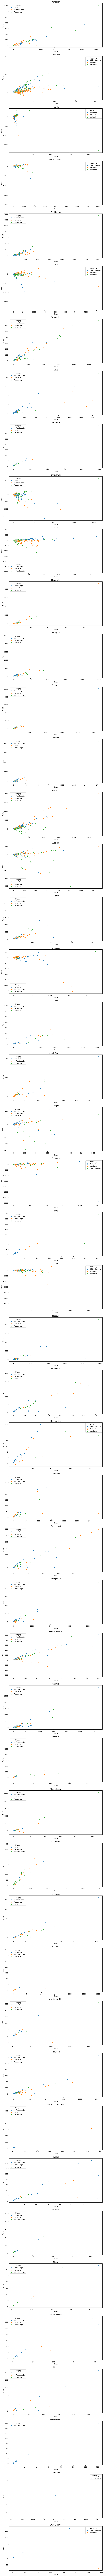

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

df = subData.copy()
# Assuming you have a DataFrame called 'df' with 'Category', 'State', 'Sales', and 'Profit' columns

# Create subplots based on the unique states
unique_states = df['State'].unique()
num_states = len(unique_states)
fig, axes = plt.subplots(nrows=num_states, figsize=(10, 5*num_states))

# Iterate over unique states
for i, state in enumerate(unique_states):
    # Subset the DataFrame for the current state
    subset = df[df['State'] == state]

    # Plotting the data for the current state
    ax = axes[i]
    sns.scatterplot(data=subset, x='Sales', y='Profit', hue='Category', ax=ax)
    ax.set_title(state)
    ax.legend(title='Category')
    ax.set_xlabel('Sales')
    ax.set_ylabel('Profit')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()